In [1]:
# %pip install seaborn

import pandas as pd
import seaborn as sns

In [2]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder
# import seaborn as sns

## Data Exploration

In [3]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
training_data = pd.read_csv('adult.data', names=names, skipinitialspace=True)
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [4]:
# Drop any rows with missing values
training_data = training_data.dropna()
# training_data["workclass"].value_counts()

# Normalizing the data 
most_common_workclass = training_data["workclass"].mode()[0]
most_common_occupation = training_data["occupation"].mode()[0]
most_common_country = training_data["native-country"].mode()[0]

training_data['workclass'].replace('?', most_common_workclass, inplace=True)
training_data['occupation'].replace('?', most_common_occupation, inplace=True)
training_data['native-country'].replace('?', most_common_country, inplace=True)

In [5]:
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Label Encoding

In [6]:
# %pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 
                       'education', 
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race', 
                       'sex', 
                       'native-country', 
                       'income']

for col in categorical_columns:
    training_data[col] = label_encoder.fit_transform(training_data[col])

# Split the data into features (X) and target variable (y)
X = training_data.drop('income', axis=1)
y = training_data['income']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Classification Model

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naïve Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)


GaussianNB()

## Pattern Extraction

In [8]:
# Get class priors (priors for each class)
class_priors = nb_model.class_prior_
print("Class Priors (Probabilities of classes):", class_priors)


Class Priors (Probabilities of classes): [0.75929054 0.24070946]


In [9]:
# Get prediction probabilities for the test set
predicted_probabilities = nb_model.predict_proba(X_test)[:, 1]

# Display the predicted probabilities for the positive class
print("Prediction Probabilities for Positive Class:\n")
for item in predicted_probabilities:
    print(item)

Prediction Probabilities for Positive Class:

0.006323886802608533
0.014152724488094017
0.020612749243183594
0.010905816691641207
0.10890083400518781
0.061121612901040095
1.0
0.0031568924326144643
0.027206141984171792
0.6919269694706427
0.027981973035753446
0.014361720376973074
0.02330676921331404
0.007170350841496193
0.006741759290262132
0.00142655962221973
0.7448698855122993
0.04792446818074217
0.9999999999827622
0.006827009284147937
0.00464641810299983
0.008962148718953337
0.03815752558897671
0.0020612655744783443
0.011732501671482012
0.010617422205862963
0.015904818160750935
0.01061238538614968
0.01507406885082693
0.001380810371662958
0.9997005931152507
0.011111775172452598
0.0035082699479069245
0.0003258900272711178
0.008400499028791369
0.9998486591416214
0.00015659189884568837
0.00900662803983683
0.0006368488944359337
0.006675128926071311
0.016281350051485847
0.013668390938798203
1.0
0.0020389029063699405
0.05532015058780622
0.02193459734370453
0.008809497946259875
0.000845829765

In [10]:
# Class conditional means (feature means) for each class
class_conditional_means = pd.DataFrame(nb_model.theta_, columns=X.columns)
print("Class Conditional Means:\n", class_conditional_means)


Class Conditional Means:
          age  workclass         fnlwgt  education  education-num  \
0  36.765851   3.094802  190202.159167  10.117504       9.597684   
1  44.288038   3.089474  188361.853110  10.825199      11.603668   

   marital-status  occupation  relationship      race       sex  capital-gain  \
0        2.782637    6.054454      1.667712  3.628122  0.610729    147.766862   
1        2.076555    6.375917      0.730144  3.775279  0.849123   3911.019777   

   capital-loss  hours-per-week  native-country  
0     54.463444       38.794418       36.301497  
1    193.740829       45.417065       36.680223  


In [11]:
# Predict probabilities for each class
class_probabilities = nb_model.predict_proba(X_test)

# Add class probabilities to the DataFrame for analysis
result_df = pd.DataFrame(class_probabilities, columns=['<=50K', '>50K'])
result_df['Predicted'] = nb_model.predict(X_test)
result_df['Actual'] = y_test.reset_index(drop=True)

print("Class Probabilities and Predictions:\n", result_df.head(10))


Class Probabilities and Predictions:
           <=50K      >50K  Predicted  Actual
0  9.936761e-01  0.006324          0       0
1  9.858473e-01  0.014153          0       0
2  9.793873e-01  0.020613          0       1
3  9.890942e-01  0.010906          0       0
4  8.910992e-01  0.108901          0       0
5  9.388784e-01  0.061122          0       1
6  2.595510e-49  1.000000          1       1
7  9.968431e-01  0.003157          0       0
8  9.727939e-01  0.027206          0       0
9  3.080730e-01  0.691927          1       1


## Model Prediction

In [12]:
# Predictions on the test set
y_pred = nb_model.predict(X_test)


In [13]:
# Get misclassified instances
misclassified_indices = y_test != y_pred
misclassified_samples = X_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_predicted_labels = y_pred[misclassified_indices]

# Display misclassified instances and their true/predicted labels
misclassified_df = pd.DataFrame({
    'True Labels': misclassified_true_labels,
    'Predicted Labels': misclassified_predicted_labels
})
print("Misclassified Instances and Labels:\n", misclassified_df)

Misclassified Instances and Labels:
        True Labels  Predicted Labels
28868            1                 0
15382            1                 0
20010            1                 0
1959             1                 0
14733            1                 0
...            ...               ...
18123            1                 0
28935            1                 0
9939             1                 0
14741            1                 0
24534            1                 0

[1304 rows x 2 columns]


## Testing Dataset Preprocessing

In [14]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
data_test = pd.read_csv('adult.test', names=names, skipinitialspace=True)
data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [15]:
# Drop any rows with missing values
data_test = data_test.dropna()

# Normalizing the data 
data_test= data_test[data_test.age !="|1x3 Cross validator"]

most_common_workclass = data_test["workclass"].mode()[0]
most_common_occupation = data_test["occupation"].mode()[0]
most_common_country = data_test["native-country"].mode()[0]

data_test['workclass'].replace('?', most_common_workclass, inplace=True)
data_test['occupation'].replace('?', most_common_occupation, inplace=True)
data_test['native-country'].replace('?', most_common_country, inplace=True)

data_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Label Encoding

In [16]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_columns:
    data_test[col] = label_encoder.fit_transform(data_test[col])

# Split the data into features (X) and target variable (y)
X = data_test.drop('income', axis=1)
y = data_test['income']

## Predict the income level with test dataset

In [17]:
# Predictions on the test set
y_pred = nb_model.predict(X)

## Model Performance Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Report
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y, y_pred)
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y, y_pred)
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.31      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.64     16281
weighted avg       0.77      0.80      0.77     16281

Accuracy: 0.7954056876113261
Precision: 0.640480087288598
Recall: 0.30525221008840353
F1-Score: 0.41345307272407117
Confusion Matrix:
 [[11776   659]
 [ 2672  1174]]


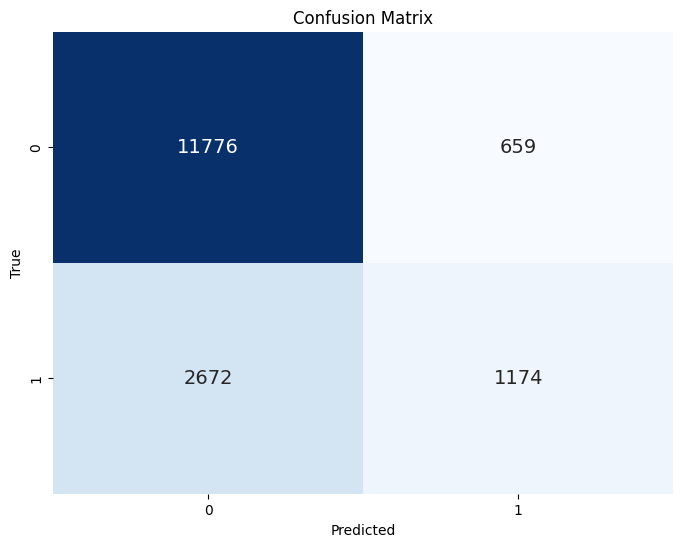

In [19]:
import matplotlib.pyplot as plt

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()